# Data Exploration on Ford GoBike Trips
## by Dane Lovell Gonzales

## Investigation Overview

> The focus of this data exploration is to investigate the average duration of trips made using Ford GoBike and the frequency of trips in terms of the time of day and day of the week.

## Dataset Overview

> The data set contains information about individual rides made in Ford GoBike bike-sharing system in February 2019, covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bike.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Duration

> Under a log scale, the distribution is unimodal and has a peak at 796 seconds. This suggests that majority of the trips taken were approximately 13 minutes long. The maximum value at 85444 seconds (around 23 hours) means that the data contains trips purchased with a day pass.

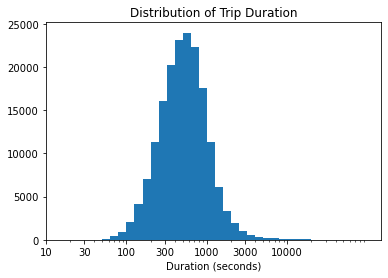

In [3]:
# Get the ticks for bins
bins = 10 ** np.arange(1.7, 5+0.1, 0.1)

# Generate the x-ticks
ticks = [10, 30, 100, 300, 1000, 3000, 10000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=df, x='duration_sec', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels);
plt.title('Distribution of Trip Duration');
plt.xlabel('Duration (seconds)');

## Distribution of Time of Day

> The distributiion is bimodal and has peaks at 8:00 and 17:00. This seems to coincide with peak hours on weekdays. There are also noticeably very few trips taken from midnight until dawn.

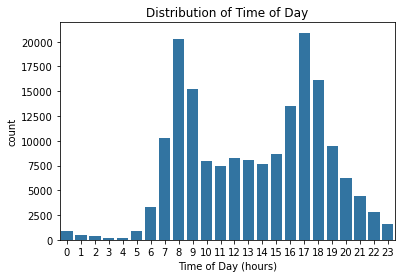

In [4]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_hour', color=base_color);
plt.title('Distribution of Time of Day');
plt.xlabel('Time of Day (hours)');

## Distribution of Day of Week

> Majority of the trips were taken on weekdays. This explains the peaks in Time of Day variable.

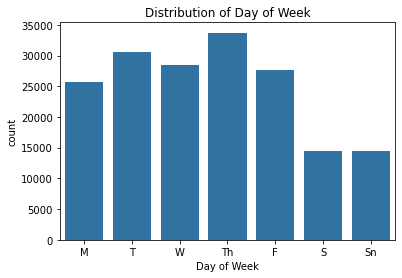

In [5]:
g = sb.countplot(data=df, x='start_day', color=base_color);
g.set_xticklabels(['M','T','W','Th','F','S','Sn']);
plt.title('Distribution of Day of Week');
plt.xlabel('Day of Week');

## Trip Duration per User Type

> The average trip duration is 796 seconds, but it varied slightly depending on the user type. The data suggests that regular customers take less but slightly longer trips than subscribers do. This can be due to customers maximizing each trip (as each trip is charged in 30 minute increments), while subscribers can take unlimited shorter trips without additional costs. Both distributions are skewed and have a bunch of outliers, which I think are valid data points that can attributed to users purchasing day passes.

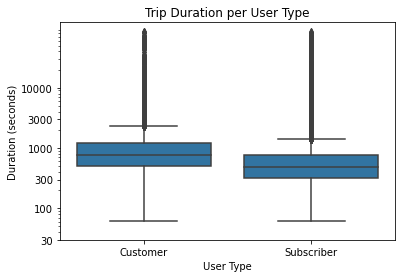

In [6]:
ticks = [30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
base_color = sb.color_palette()[0]

sb.boxplot(x='user_type', y='duration_sec', data=df, color=base_color)
plt.yscale('log');
plt.yticks(ticks, labels);
plt.title('Trip Duration per User Type');
plt.xlabel('User Type');
plt.ylabel('Duration (seconds)');

## Trip Duration and User Type by Gender

> Customers consistently took longer trips regardless of the gender. This agrees the results from previous bivariate explorations and reinforces the relationship between user type and duration. Unspecified genders had a different effect on the relationship between the duration and Bike Share for All variable. However, this may be insignificant as other genders only account for 2% of the data.

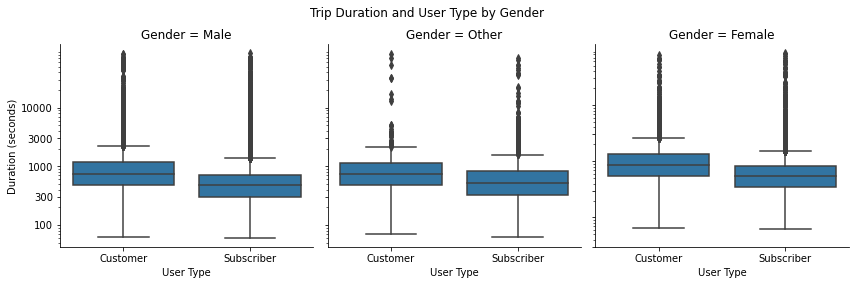

In [7]:
g = sb.FacetGrid(data = df, col = 'member_gender', height = 4);
g.map(sb.boxplot, 'user_type', 'duration_sec', order=['Customer','Subscriber']);
plt.yscale('log');
plt.yticks(ticks, labels);
g.set_axis_labels('User Type', 'Duration (seconds)');
axes = g.axes.flatten()
axes[0].set_title('Gender = Male')
axes[1].set_title('Gender = Other')
axes[2].set_title('Gender = Female')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Trip Duration and User Type by Gender');

## Trips per Hour by User Type

> Both plots have bimodal distributions with peaks on the same hours. The subscriber plot has sharper peaks than the customer plot. Looking at the proportions, regular customers took trips throughout the day whereas subscribers noticeably took most of the trips on peak hours. This suggests that the frequency of trips per hour depends on the user type.

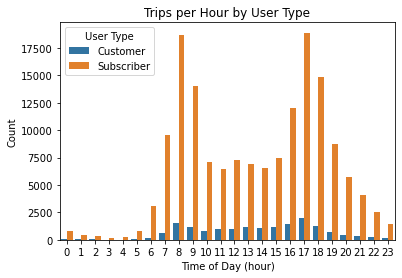

In [8]:
g = sb.countplot(data=df, x='start_hour', hue='user_type');
plt.title('Trips per Hour by User Type')
plt.legend(title='User Type');
plt.xlabel('Time of Day (hour)');
plt.ylabel('Count');

## Trips per Hour by "Bike Share for All" Membership

> The distributions look very different. For non-discounted trips, there are two distinct peaks whereas for discounted trips, the frequency gradually increased from where the first peak should have been up to the second peak. This suggests that non-discounted trips are only taken mostly during peak hours while discounted trips are dispersed throughout the day.

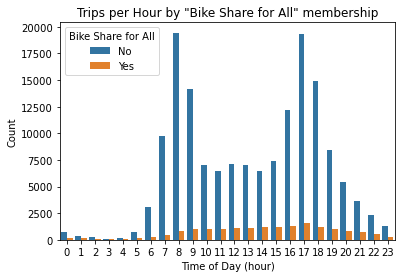

In [9]:
g = sb.countplot(data=df, x='start_hour', hue='bike_share_for_all_trip');
plt.title('Trips per Hour by "Bike Share for All" membership')
plt.legend(title='Bike Share for All');
plt.xlabel('Time of Day (hour)');
plt.ylabel('Count');

## Trips per Day by User Type

> Looking closely, both user types have taken most trips on Thursdays. One huge difference between the two is on the frequency of trips taken on weekdays and weekends. Customers have taken a almost the same number of trips daily whereas subscribers have taken most of the trips on weekdays.

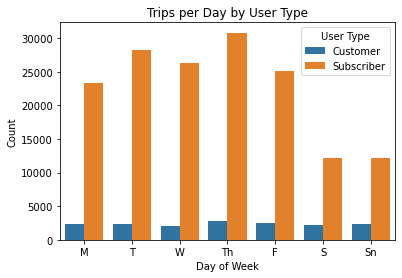

In [10]:
days = ['M','T','W','Th','F','S','Sn'];
g = sb.countplot(data=df, x='start_day', hue='user_type');
g.set_xticklabels(days);
plt.title('Trips per Day by User Type')
plt.legend(title='User Type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

## Trips per Day by "Bike Share for All" membership

> The results are quite similar to the previous plot. In this case, non-discounted trips were taken more frequently on weekdays while discounted ones were taken almost constantly throughout the week.

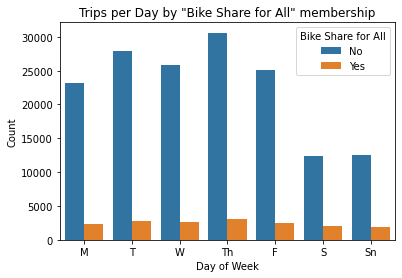

In [11]:
g = sb.countplot(data=df, x='start_day', hue='bike_share_for_all_trip');
g.set_xticklabels(days);
plt.title('Trips per Day by "Bike Share for All" membership')
plt.legend(title='Bike Share for All');
plt.xlabel('Day of Week');
plt.ylabel('Count');